In [57]:
from manim import *
from scipy.optimize import fsolve
import numpy as np
import random

config.media_width = "75%"
config.verbosity = "WARNING"

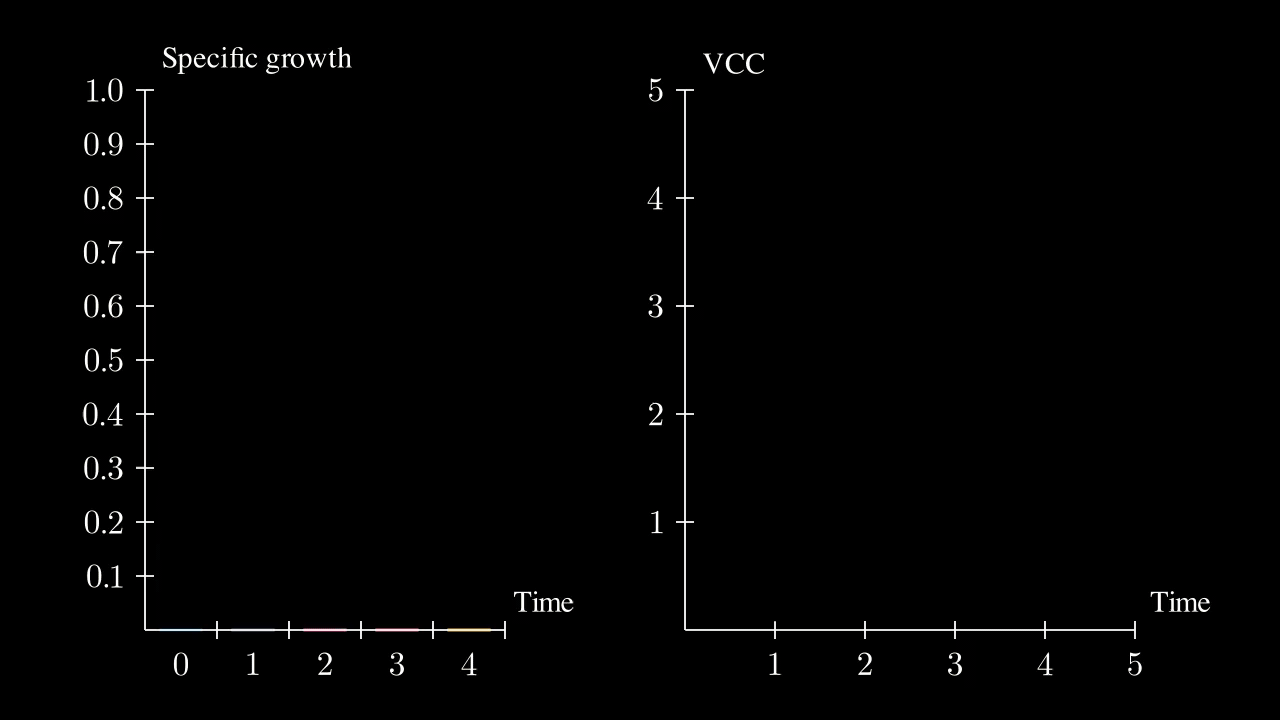

In [84]:
%%manim -qm --format=gif VccDigitalTwin

class VccDigitalTwin(Scene):

    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]    

    def construct(self):

        random.seed(a=1)

        ax = Axes(
            x_range=[0, 5, 1],
            y_range=[0, 5, 1],
            x_length=5,
            tips=False,
            axis_config={"include_numbers": True},
        )

        ax.shift(RIGHT*3)

        ax_labels = ax.get_axis_labels(
            Text("Time").scale(0.5), Text("VCC").scale(0.5)
            )

        r0 = ValueTracker(0)
        r1 = ValueTracker(0)
        r2 = ValueTracker(0)
        r3 = ValueTracker(0)
        r4 = ValueTracker(0)
        tt = ValueTracker(5)
        chart = BarChart(
            values=[r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()],
            bar_names=[0,1,2,3,4],
            y_range=[0,1,0.1],
            y_length=6,
            x_length=4,
            x_axis_config={"font_size": 36},
        )

        chart.shift(LEFT*3.5)

        chart_labels = chart.get_axis_labels(
            Text("Time").scale(0.5), Text("Specific growth").scale(0.5)
            )

        def chart_updater(obj):
            obj.change_bar_values([r0.get_value(),r1.get_value(),r2.get_value(),r3.get_value(),r4.get_value()])

        chart.add_updater(chart_updater)

        def add_offline(self,y,dot_prev = None):
            if dot_prev is None:
                dot = Dot(ax.coords_to_point(0.0, y), color=GREEN)
                dot.x = 0.0
                dot.y = y
                self.play(Create(dot))
            else:
                dot = Dot(ax.coords_to_point(dot_prev.x + 1, y), color=GREEN)
                dot.x = dot_prev.x + 1
                dot.y = y
                self.play(Create(dot),dot_prev.animate.set_color(GRAY))
            return dot

        def func(t,t0,y0,r):
            return y0*np.exp(r*(t - t0))
        

        def predict(self,dot,r,delta_t):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            line = ax.plot(func2,x_range = [t0,t0 + delta_t])
            self.play(Create(line))
            return func2(t0 + 1) + random.uniform(-0.25,0.25)

        def transfer(self,dot,r):
            t0 = dot.x
            y0 = dot.y            
            func2 = lambda t: func(t,t0,y0,r)
            func3 = lambda t: abs(func2(t) - 3)
            t1 = fsolve(func3,2.5)
            line = ax.plot(func2,x_range = [t0 + 1,t1[0]])
            self.play(Create(line),tt.animate.set_value(t1))
            self.play(Uncreate(line))    
            return t1       

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (tt.get_value(), 3)
                    )
                ]
            )
            polygon.stroke_width = 1
            # polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon    

        polygon = always_redraw(get_rectangle)         

        # def tf_crit_updater(obj):
        #     obj.x_range = [0,tt.get_value()]   

        # tf_crit.add_updater(tf_lines_updater)

        self.add(ax, ax_labels, chart, chart_labels)
        self.play(Create(polygon))
        delta_t = 1
        dot = add_offline(self,0.5)
        self.play(r0.animate.set_value(0.5))
        y = predict(self,dot,r0.get_value(),delta_t)
        transfer(self,dot,r0.get_value())
        dot = add_offline(self,y,dot_prev = dot)
        self.play(r1.animate.set_value(0.9))
        y = predict(self,dot,r1.get_value(),delta_t)
        transfer(self,dot,r1.get_value())
        dot = add_offline(self,y,dot_prev = dot)
        self.play(r2.animate.set_value(0.4))
        y = predict(self,dot,r2.get_value(),delta_t)
        transfer(self,dot,r2.get_value())
        dot = add_offline(self,y,dot_prev = dot)
        self.play(r3.animate.set_value(0.2))
        y = predict(self,dot,r3.get_value(),delta_t)
        transfer(self,dot,r3.get_value())
        dot = add_offline(self,y,dot_prev = dot)
        self.play(r4.animate.set_value(0.1))
        y = predict(self,dot,r4.get_value(),delta_t)